<a href="https://colab.research.google.com/github/Varshan98/Suriya_DSL_HW/blob/main/HW3_VerilogGitPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [7]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Verilog HDL Practice

This practice helps to appreciate the content of the lectures. The solutions are also proposed for reference. However, you may improve the solution.


## Submission

Copy this file to your Google Colab and link to Github. Update the solutions by incorporating Python, plots the waveforms, improve the solutions, whichever applicable.

# A. Hierarchical Modelling Concepts - Module

1. An interconnect switch (IS) contains the following components, a shared memory (MEM), a system controller (SC) and a data crossbar (Xbar).
a) Define the modules MEM, SC, and Xbar, using the module/endmodule keywords. You do not need to define the internals. Assume that the modules have no terminal lists.

In [ ]:
%%verilog

module MEM;
endmodule

module SC;
endmodule

module Xbar;
endmodule




b) Define the module IS, using the module/endmodule keywords. Instantiate the modules MEM, SC, Xbar and call the instance mem1, sc1, and xbar1, respectively. You do not need to define the internals. Assume that the module IS has no terminals.





In [ ]:
%%verilog

module IS;

MEM mem1;
SC sc1;
Xbar xbar1;

endmodule


c) Define a stimulus block (Top), using the module/endmodule keywords. Instantiate the design block IS and call the instance is1. This is the final step in building the simulation environment.




In [ ]:
%%verilog

module Top;

IS is1;

endmodule

2. A 4-bit ripple carry adder (Ripple_Add) contains four 1-bit full adders (FA).
a) Define the module FA. Do not define the internals or the terminal list.




In [ ]:
%%verilog

module FA;

endmodule

b) Define the module Ripple_Add. Do not define the internals or the terminal list. Instantiate four full adders of type FA in the module Ripple_Add and call them fa0, fa1, fa2, fa3.




In [ ]:
%%verilog

module Ripple_Add;

FA fa0;
FA fa1;
FA fa2;
FA fa3;

endmodule

# B. Basic Concepts of Digital Number

1. Practice writing the following numbers:

a) Decimal number 123 as a sized 8-bit number in binary. Use _ for readability.

#### Decimal to Binary Conversion
| Decimal (d) | Divide (d/2) | Modulus (d % 2) | Binary (LSB → MSB) |
|-------------|--------------|-----------------|--------------------|
| 123         | 61           | 1               | 1 (LSB)            |
| 61          | 30           | 1               | 1                  |
| 30          | 15           | 0               | 0                  |
| 15          | 7            | 1               | 1                  |
| 7           | 3            | 1               | 1                  |
| 3           | 1            | 1               | 1                  |
| 1           | 0            | 1               | 1                  |
| 0           | 0            | 0               | 0 (MSB)            |

**Result:** Binary = `01111011` (8 bits, MSB first).

----

#### Binary to Decimal Conversion
| Bit Position (n) | 2^n  | Bit (b) | Contribution (b × 2^n) |
|-------------------|------|---------|-------------------------|
| 7 (MSB)           | 128  | 0       | 0                       |
| 6                 | 64   | 1       | 64                      |
| 5                 | 32   | 1       | 32                      |
| 4                 | 16   | 1       | 16                      |
| 3                 | 8    | 1       | 8                       |
| 2                 | 4    | 0       | 0                       |
| 1                 | 2    | 1       | 2                       |
| 0 (LSB)           | 1    | 1       | 1                       |

**Total:**  
\( 64 + 32 + 16 + 8 + 0 + 2 + 1 = $\boxed{123}$ \)

LSB: least significant bit
MSB: most significant bit

In [ ]:

8'b01111011
8'b0111_1011

b) A 16-bit hexadecimal unknown number with all x’s.

In [ ]:

16'hx

c) A 4-bit negative 2 in decimal. Write the 2’s complement form for this number.

In [ ]:

4'd2    //a) 4 bits decimal number, 2
4'b0010 //b) 4 bits binary number, 2
-4'd2   //c) 4 bits decimal number, -2
4'b1110 //d) 4 bit binary number for negative 2, in 2's complement format

Using algorithm for conversion of -2 to 2's complement number in binary:
I. Invert the binary number
$$0010_{2} \to 1101_{2}$$
II. Add 1
$$1101_2 + 1_2 = 1110_2$$

In [1]:
def decimal_to_twos_complement(n, bits=4):
    """Convert a decimal number to its 2's complement binary representation with the given bit width."""
    if n < 0:
        n = (1 << bits) + n  # Compute two's complement for negative numbers
    return format(n, f'0{bits}b')  # Format as binary with leading zeros

# Example: Convert -2 to 4-bit 2's complement
decimal_number = -2
twos_complement = decimal_to_twos_complement(decimal_number, 4)

print(f"4-bit 2's complement of {decimal_number}: {twos_complement}")


4-bit 2's complement of -2: 1110


d) An unsized hex number 1234.

In [ ]:
32'h1234 //unsized default to 32 bits


4. Declare the following variables in Verilog:

a) An 8-bit vector net called a_in.

b) A 32-bit storage register called address. Bit 31 must be the most significant bit. Set the value of the register to a 32-bit decimal number equal to 3.

c) An integer called cout.

d) A time variable called snap_shot.

e) An array called delays. Array contains 20 elements of the type integer.

f) A memory MEM containing 256 words of 64 bits each.

g) A parameter cache_size equal to 512.

In [ ]:

//a)
wire [7:0] a_in;

//b)
reg [31:0] address = 32'd3;

//c)
integer cout;

//d)
time snap_shot;

//e)
integer delays[19:0];

//f)
reg [63:0] MEM[255:0];

//g)
parameter cache_size=512;



5. What would be the output/effect of the following statements?

a) latch = 4’d12;
$display(“The current value of latch = %b\n”, latch);

b) in_reg=3’d2;
$monitor($time, “ In register value = %b\n”, in_reg[2:0]);

c) \`define MEM_SIZE 1024
$display(“ The maximum memory size is %h”, `MEM_SIZE);

In [ ]:
//a)
The current value of latch = 4'b1100

The current value of latch = 1100

//b)
0 In register value = 3'b010

0 In register value = 010

$$1024_{10} = 2^{10} = 100\_0000\_0000_{2} = 400_{16}$$

In [ ]:
//c)
The maximum memory size is 'h400

The maximum memory size is 400

# C. Modules and Ports

1. What are the basic components of a module? Which components are mandatory?

In [ ]:
// Basic components:
Module Name, Port List, Port Declarations, Parameters, Declarations of wires, regs and other variables, Data flow statements, Instantiation of lower level modules, always and initial blocks, Tasks and functions, endmodule statement.

// Mandatory:
module, module name, and endmodule.

3. A 4-bit parallel shift register has I/O pins as shown in the figure bellow. Write the module definition for this module shift_reg. Include the list of ports and port declarations. You do not need to show the internals.

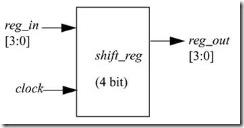

In [ ]:
%%verilog

module shift_reg(reg_out, reg_in, clock);
 output reg [3:0] reg_out;
 input [3:0] reg_in;
 input clock;

endmodule

In [ ]:
%%verilog

module shift_reg (
    input clock,         // Clock signal
    input [3:0] reg_in,  // Parallel data input
    output reg [3:0] reg_out // Parallel data output
);
endmodule

4. Base on Question-3. Declare a top-level module stimulus. Define REG_IN(4-bit) and CLK(1-bit) as reg register variables and REG_OUT(4-bit) as wire. Instantiate the module shift_reg and call it sr1. Connect the ports by 1. ordered list. 2. name list.

In [ ]:
%%verilog

module stimulus;
 wire [3:0] REG_OUT;
 reg [3:0] REG_IN;
 reg CLK;
 //by ordered list
 shift_reg sr1(REG_OUT, REG_IN, CLK);

endmodule


In [ ]:
%%verilog

module stimulus;
 wire [3:0] REG_OUT;
 reg [3:0] REG_IN;
 reg CLK;
 //by name list
 shift_reg sr1(.reg_out(REG_OUT), .reg_in(REG_IN), .clock(CLK));

endmodule

6. Write the hierarchical names for variables REG_IN,CLK,REG_OUT;

In [ ]:
stimulus.REG_IN, stimulus.CLK, stimulus.REG_OUT


7. Write the hierarchical name, for instance sr1. Write the hierarchical names for its ports clock and reg_in.

In [ ]:
stimulus.sr1, stimulus.sr1.clock, stimulus.sr1.reg_in

# D. Dataflow Modelling

1. A full subtractor has three 1-bit inputs x, y, and z (previous borrow) and two 1-bit outputs D (difference) and B (borrow). The logic equations for D and B are as follows:

D=x’.y’.z + x’.y.z’ + x.y’.z’ + x.y.z

B=x’.y + x’.z + y.z

Write the full Verilog description (use "always" instead of "assign") for the subtractor module, including I/O ports (Remember that + in logic equations corresponds to a logical or operator (||) in dataflow). Instantiate the subtractor inside a stimulus block and test all eight possible combinations of x, y, and z given in the following truth table.


### Truth Table for Inputs (B, D) and Outputs (x, y, z)

| **Input** |     | **Output** |   |   |
|-----------|-----|------------|---|---|
| **B**     | **D** | **x**     | **y** | **z** |
|-----------|-----|------------|---|---|
| 0         | 0   | 0          | 0   | 0   |
| 0         | 1   | 1          | 0   | 0   |
| 1         | 0   | 1          | 1   | 0   |
| 1         | 1   | 0          | 0   | 0   |
| 0         | 0   | 0          | 1   | 0   |
| 0         | 1   | 0          | 0   | 1   |
| 1         | 0   | 1          | 0   | 1   |
| 1         | 1   | 1          | 1   | 1   |



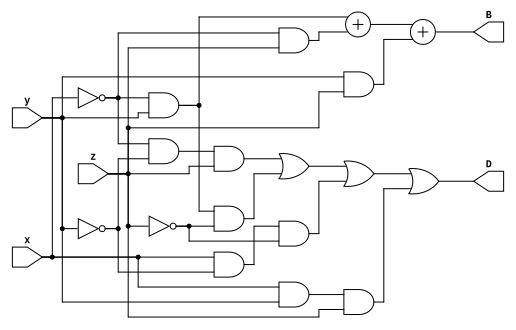

In [ ]:
%%print_verilog

module fs(B,D,x,y,z);
 output reg B,D;
 input x,y,z;

 always @(*)
  begin
   D <= (~x & ~y & z) || (~x & y & ~z) || (x & ~y & ~z) || (x & y & z);
   B <= (~x & y) + (~x & z) + (y & z);
  end

endmodule

**Python Code**

In [2]:
def fs(x, y, z):
    # Calculate D based on the given logic
    D = (~x & ~y & z) | (~x & y & ~z) | (x & ~y & ~z) | (x & y & z)

    # Calculate B based on the given logic
    B = (~x & y) | (~x & z) | (y & z)

    # Return the outputs
    return B, D

# Test the function with some input values
if __name__ == "__main__":
    # Test values for x, y, z
    test_inputs = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1),
                   (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

    for x, y, z in test_inputs:
        B, D = fs(x, y, z)
        print(f"For x={x}, y={y}, z={z} => B={B}, D={D}")


For x=0, y=0, z=0 => B=0, D=0
For x=0, y=0, z=1 => B=1, D=1
For x=0, y=1, z=0 => B=1, D=1
For x=0, y=1, z=1 => B=1, D=0
For x=1, y=0, z=0 => B=0, D=1
For x=1, y=0, z=1 => B=0, D=0
For x=1, y=1, z=0 => B=0, D=0
For x=1, y=1, z=1 => B=1, D=1


In [5]:
%%verilog

////
module main;
 wire Bt,Dt;
 reg xt,yt,zt;

 fs fs1(Bt,Dt,xt,yt,zt);

 initial xt=0; always #40 xt=~xt;
 initial yt=0; always #20 yt=~yt;
 initial zt=0; always #10 zt=~zt;

 initial
  begin
  $dumpfile("main.vcd");
  $dumpvars;
   #71 $finish;
  end

 initial
  $monitor($time, " B=%b,D=%b | x=%b,y=%b,z=%b", Bt,Dt,xt,yt,zt);

endmodule
////

////
module fs(B,D,x,y,z);
 output reg B,D;
 input x,y,z;

 always @(*)
  begin
   D <= (~x & ~y & z) || (~x & y & ~z) || (x & ~y & ~z) || (x & y & z);
   B <= (~x & y) + (~x & z) + (y & z);
  end

endmodule
////

VCD info: dumpfile main.vcd opened for output.
                   0 B=0,D=0 | x=0,y=0,z=0
                  10 B=1,D=1 | x=0,y=0,z=1
                  20 B=1,D=1 | x=0,y=1,z=0
                  30 B=1,D=0 | x=0,y=1,z=1
                  40 B=0,D=1 | x=1,y=0,z=0
                  50 B=0,D=0 | x=1,y=0,z=1
                  60 B=0,D=0 | x=1,y=1,z=0
                  70 B=1,D=1 | x=1,y=1,z=1



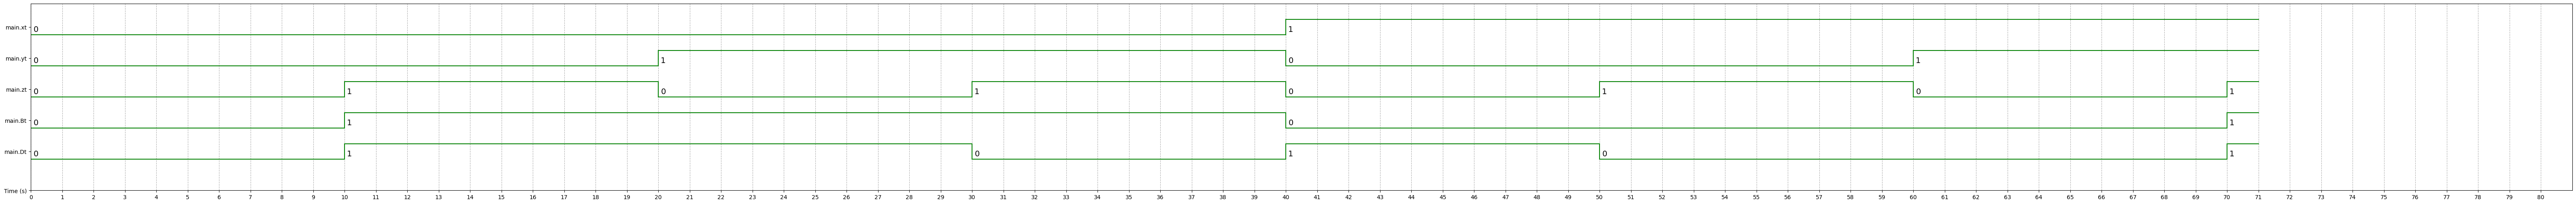

In [10]:
%%waveform main.vcd
sign_list = ['main.xt','main.yt','main.zt','main.Bt','main.Dt']
time_begin = 0
time_end = 80
base = 'bin' # bin, dec, dec2, hex, octal

# E. Behavioural Modelling

1. Declare a register called oscillate. Initialize it to 0 and make it toggle every 30 time units. Do not use always statement (Hint: Use the forever loop). This is a testbench design. Note: always statement is introduced and used in this course for clock generation.

In [35]:
%%verilog

module oscillate_tb;
 reg ocsillate;

 initial
  begin
   ocsillate=1'b0;
   forever #30 ocsillate=~ocsillate;
  end

 initial
  begin
   $dumpfile("oscillate.vcd");
   $dumpvars(0,oscillate_tb);
   #151 $finish;
  end

 initial
  $monitor($time," oscillate=%b",ocsillate);

endmodule

VCD info: dumpfile oscillate.vcd opened for output.
                   0 oscillate=0
                  30 oscillate=1
                  60 oscillate=0
                  90 oscillate=1
                 120 oscillate=0
                 150 oscillate=1



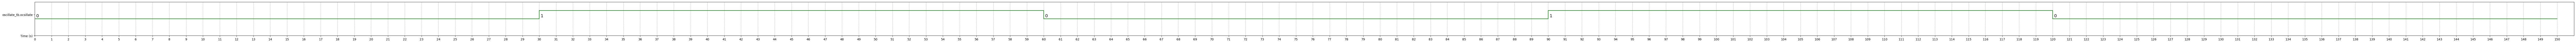

In [36]:
%%waveform oscillate.vcd
sign_list = ['oscillate_tb.ocsillate']
time_begin = 0
time_end = 150
base = 'bin' # bin, dec, dec2, hex, octal

**Python code**

In [13]:
import time

def oscillate():
    ocsillate = 0  # Initial value of ocsillate (0 means low)
    time_step = 30  # Time step interval in arbitrary units (e.g., milliseconds)
    max_time = 151  # Simulation time to finish (similar to #151 in Verilog)

    # Monitor the signal value at each time step
    current_time = 0
    while current_time <= max_time:
        print(f"At time {current_time}ns: oscillate = {ocsillate}")

        # Wait for the next time step
        time.sleep(time_step / 1000)  # Simulate time step (convert to seconds)
        ocsillate = 1 - ocsillate  # Toggle the signal
        current_time += time_step  # Increment time

if __name__ == "__main__":
    oscillate()


At time 0ns: oscillate = 0
At time 30ns: oscillate = 1
At time 60ns: oscillate = 0
At time 90ns: oscillate = 1
At time 120ns: oscillate = 0
At time 150ns: oscillate = 1


2. Design a clock with time period = 40 and a duty cycle of 25% by using the always and initial statements. The value of clock at time = 0 should be initialized to 0.
$$D=\frac{t_{on}}{T}=0.25$$
$$t_{on}=D\cdot T=0.25\cdot 40=10$$
$$t_{off}=T-t_{on}=40-10=30$$

In [37]:
%%verilog

module d25_tb;
 reg clock;

 initial clock=0;
 always
  begin
    #30 clock=~clock;
    #10 clock=~clock;
  end

 initial
 begin
  $dumpfile("d25.vcd");
  $dumpvars(0,d25_tb);
  #121 $finish;
 end

 initial
  $monitor($time, " clock=%b", clock);

endmodule

VCD info: dumpfile d25.vcd opened for output.
                   0 clock=0
                  30 clock=1
                  40 clock=0
                  70 clock=1
                  80 clock=0
                 110 clock=1
                 120 clock=0



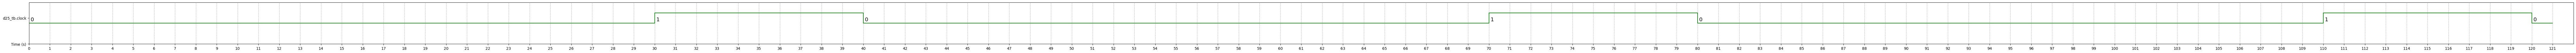

In [40]:
%%waveform d25.vcd
sign_list = ['d25_tb.clock']
time_begin = 0
time_end = 121
base = 'bin' # bin, dec, dec2, hex, octal

**Python version**

In [19]:
def simulate_clock():
    clock = 0  # Initial value of clock
    time_step_1 = 30  # First clock toggle interval (30ns)
    time_step_2 = 10  # Second clock toggle interval (10ns)
    max_time = 121  # Maximum simulation time (121ns)

    current_time = 0  # Start simulation time

    # Run the simulation until max_time is reached
    while (current_time + time_step_1) < max_time:
        # Monitor the clock signal value at each time step
        print(f"At time {current_time}ns: clock = {clock}")

        # First toggle of the clock (30ns interval)
        if current_time + time_step_1 <= max_time:
            current_time += time_step_1
            clock = 1 - clock  # Toggle clock
            print(f"At time {current_time}ns: clock = {clock}")

        # Second toggle of the clock (10ns interval)
        if current_time + time_step_2 <= max_time:
            current_time += time_step_2
            clock = 1 - clock  # Toggle clock again
            print(f"At time {current_time}ns: clock = {clock}")

    # Print the final state of the clock
    print(f"Final time: {current_time}ns, clock = {clock}")

if __name__ == "__main__":
    simulate_clock()


At time 0ns: clock = 0
At time 30ns: clock = 1
At time 40ns: clock = 0
At time 40ns: clock = 0
At time 70ns: clock = 1
At time 80ns: clock = 0
At time 80ns: clock = 0
At time 110ns: clock = 1
At time 120ns: clock = 0
Final time: 120ns, clock = 0


3. Given below is an initial block with blocking procedural assignments. At what simulation time is each statement executed? What are the intermediate and final values of a, b, c, d? Write a Verilog testbench to display the results, using $monitor, and waveform.


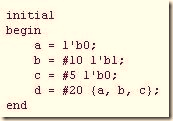

In [8]:
%%verilog

//Blocking
module abcd_tb;
 reg a,b,c;
 reg [2:0] d;

 initial begin
  a = 1'b0;
  b = #10 1'b1;
  c = #5 1'b0;
  d = #20 {a,b,c};
 end

 initial begin
  $dumpfile("abcd.vcd");
  $dumpvars(0,abcd_tb);
  #36 $finish;
 end

 initial
  $monitor($time, " a=%b b=%b c=%b d=%b", a,b,c,d);

endmodule

Installing. Please wait... done!
VCD info: dumpfile abcd.vcd opened for output.
                   0 a=0 b=x c=x d=xxx
                  10 a=0 b=1 c=x d=xxx
                  15 a=0 b=1 c=0 d=xxx
                  35 a=0 b=1 c=0 d=010



In [9]:
%%verilog

//non-blocking
module abcd1_tb;
 reg a,b,c;
 reg [2:0] d;

 initial begin
  a <= 1'b0;
  b <= #10 1'b1;
  c <= #5 1'b0;
  d <= #20 {a,b,c};
 end

 initial begin
  $dumpfile("abcd1.vcd");
  $dumpvars(0,abcd1_tb);
  #36 $finish;
 end

 initial
  $monitor($time, " a=%b b=%b c=%b d=%b", a,b,c,d);

endmodule


VCD info: dumpfile abcd1.vcd opened for output.
                   0 a=0 b=x c=x d=xxx
                   5 a=0 b=x c=0 d=xxx
                  10 a=0 b=1 c=0 d=xxx



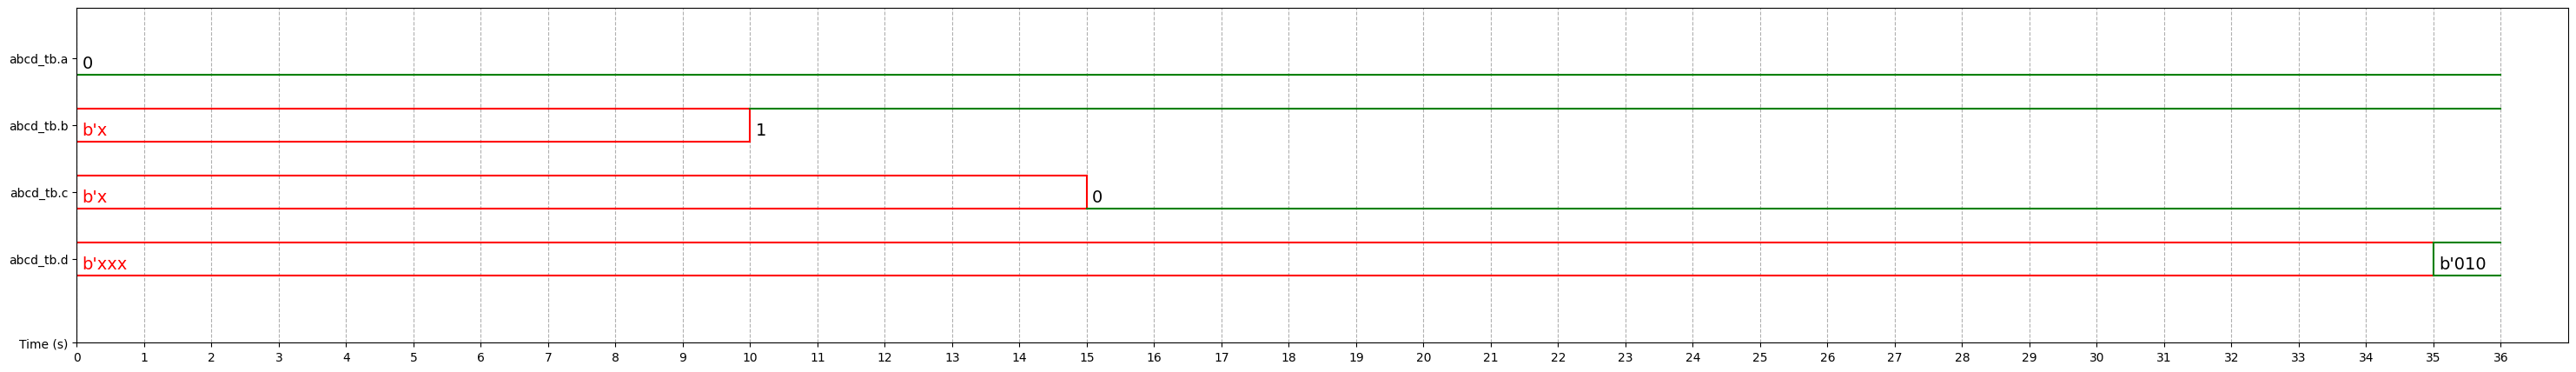

In [12]:
%%waveform abcd.vcd
sign_list = ['abcd_tb.a','abcd_tb.b','abcd_tb.c','abcd_tb.d']
time_begin = 0
time_end = 36
base = 'bin' # bin, dec, dec2, hex, octal

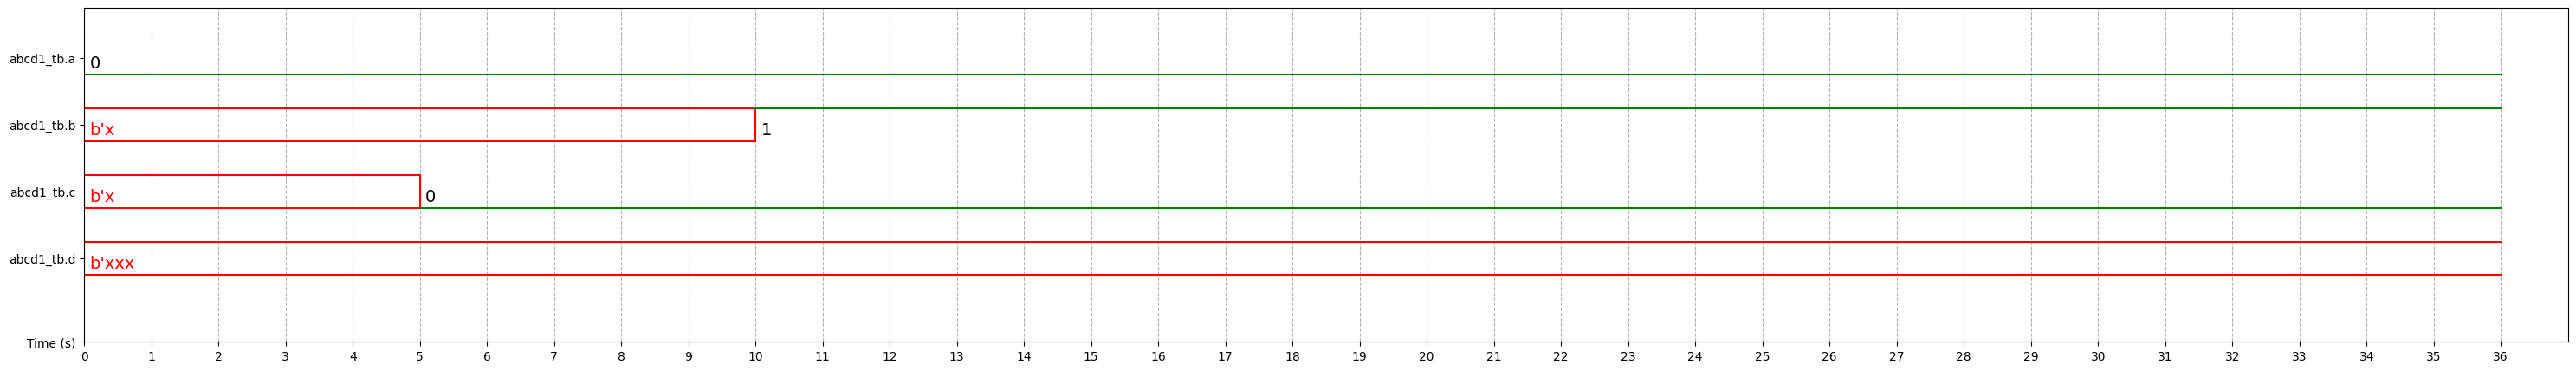

In [13]:
%%waveform abcd1.vcd
sign_list = ['abcd1_tb.a','abcd1_tb.b','abcd1_tb.c','abcd1_tb.d']
time_begin = 0
time_end = 36
base = 'bin' # bin, dec, dec2, hex, octal

7. Design a negative edge-triggered D-flipflop(D_FF) with synchronous clear, active high (D_FF clears only at a negative edge of clock when clear is high). Use behavioral statements only. (Hint: Output q of D_FF must be declared as reg). Design a clock with a period of 10 units and test the D_FF.



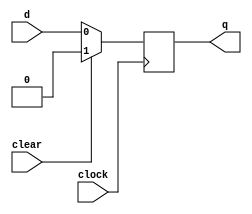

In [ ]:
%%print_verilog

module dff(q,d,clock,clear);
 output reg q;
 input d,clock,clear;

 always @(negedge clock)
  if (clear) q<=1'b0;
  else q<=d;

endmodule

In [14]:
%%verilog

module dff(q,d,clock,clear);
 output reg q;
 input d,clock,clear;

 always @(negedge clock)
  if (clear) q<=1'b0;
  else q<=d;

endmodule

module dff_tb;
 wire q;
 reg d,clock,clear;

 dff dff1(q,d,clock,clear);

 initial begin
  clock=1'b0;
  forever #5 clock=~clock;
 end

 initial begin
  $dumpfile("dff.vcd");
  $dumpvars(0,dff_tb);

  #00 d=1'b1; clear=1'b1;
  #11 d=1'b1; clear=1'b0;
  #11 d=1'b1; clear=1'b1;
  #11 $finish;
 end

 initial
  $monitor($time, " q=%b,d=%b,clock=%b,clear=%b",q,d,clock,clear);

endmodule


VCD info: dumpfile dff.vcd opened for output.
                   0 q=x,d=1,clock=0,clear=1
                   5 q=x,d=1,clock=1,clear=1
                  10 q=0,d=1,clock=0,clear=1
                  11 q=0,d=1,clock=0,clear=0
                  15 q=0,d=1,clock=1,clear=0
                  20 q=1,d=1,clock=0,clear=0
                  22 q=1,d=1,clock=0,clear=1
                  25 q=1,d=1,clock=1,clear=1
                  30 q=0,d=1,clock=0,clear=1



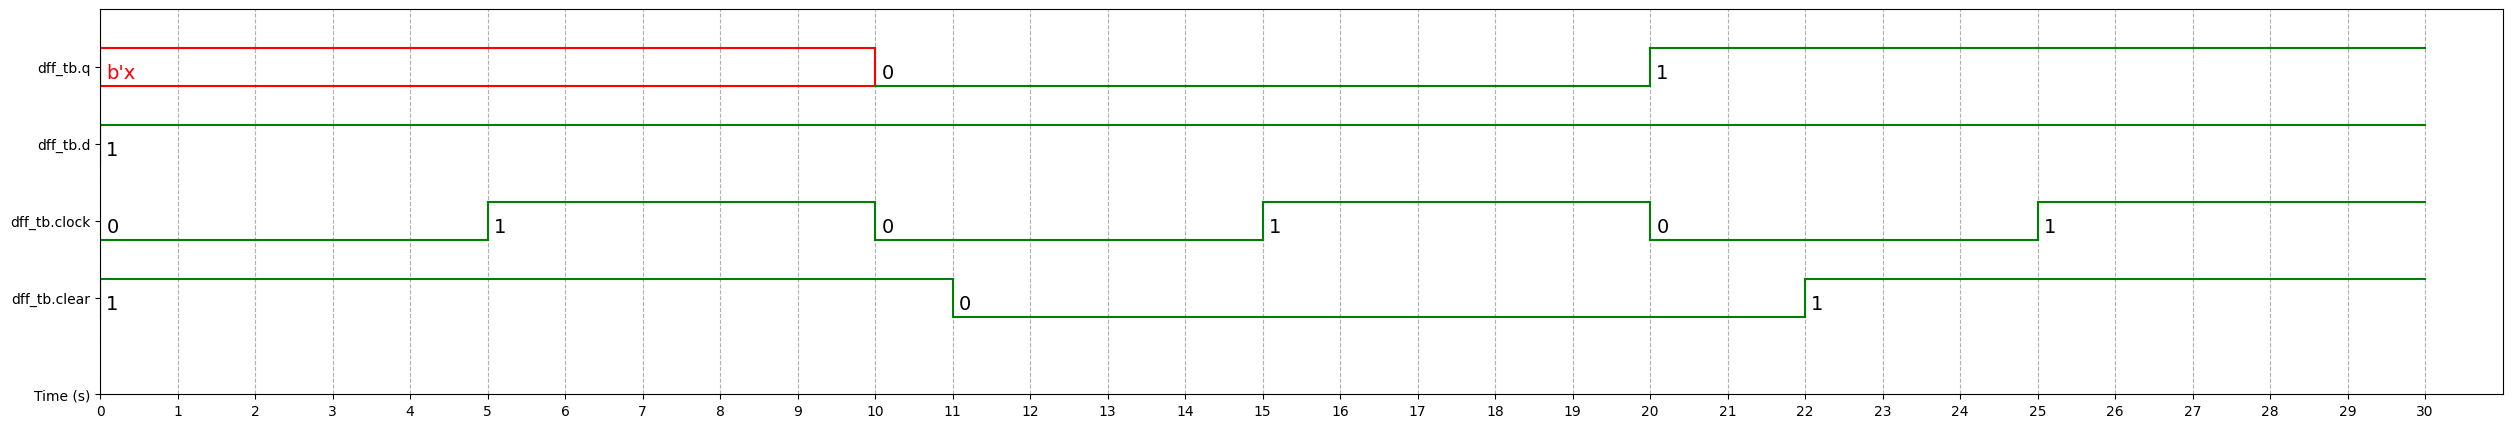

In [16]:
%%waveform dff.vcd
sign_list = ['dff_tb.q','dff_tb.d','dff_tb.clock','dff_tb.clear']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

8. Design the D-flipflop in exercise 7 with asynchronous clear (D_FF clears whenever clear goes high. It does not wait for next negative edge). Test the D_FF.

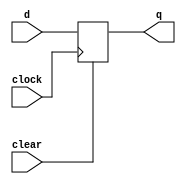

In [ ]:
%%print_verilog

module dffa(q,d,clock,clear);
 output reg q;
 input d,clock,clear;

 always @(negedge clock or posedge clear)
  if (clear) q<=1'b0;
  else q<=d;

endmodule

In [17]:
%%verilog

module dffa(q,d,clock,clear);
 output reg q;
 input d,clock,clear;

 always @(negedge clock or posedge clear)
  if (clear) q<=1'b0;
  else q<=d;

endmodule

module dffa_tb;
 wire q;
 reg d,clock,clear;

 dffa dffa1(q,d,clock,clear);

 initial begin
  clock=1'b0;
  forever #5 clock=~clock;
 end

 initial begin
  $dumpfile("dffa.vcd");
  $dumpvars(0,dffa_tb);

  #00 d=1'b1; clear=1'b1;
  #11 d=1'b1; clear=1'b0;
  #11 d=1'b1; clear=1'b1;
  #11 $finish;
 end

 initial
  $monitor($time, " q=%b,d=%b,clock=%b,clear=%b",q,d,clock,clear);

endmodule



VCD info: dumpfile dffa.vcd opened for output.
                   0 q=0,d=1,clock=0,clear=1
                   5 q=0,d=1,clock=1,clear=1
                  10 q=0,d=1,clock=0,clear=1
                  11 q=0,d=1,clock=0,clear=0
                  15 q=0,d=1,clock=1,clear=0
                  20 q=1,d=1,clock=0,clear=0
                  22 q=0,d=1,clock=0,clear=1
                  25 q=0,d=1,clock=1,clear=1
                  30 q=0,d=1,clock=0,clear=1



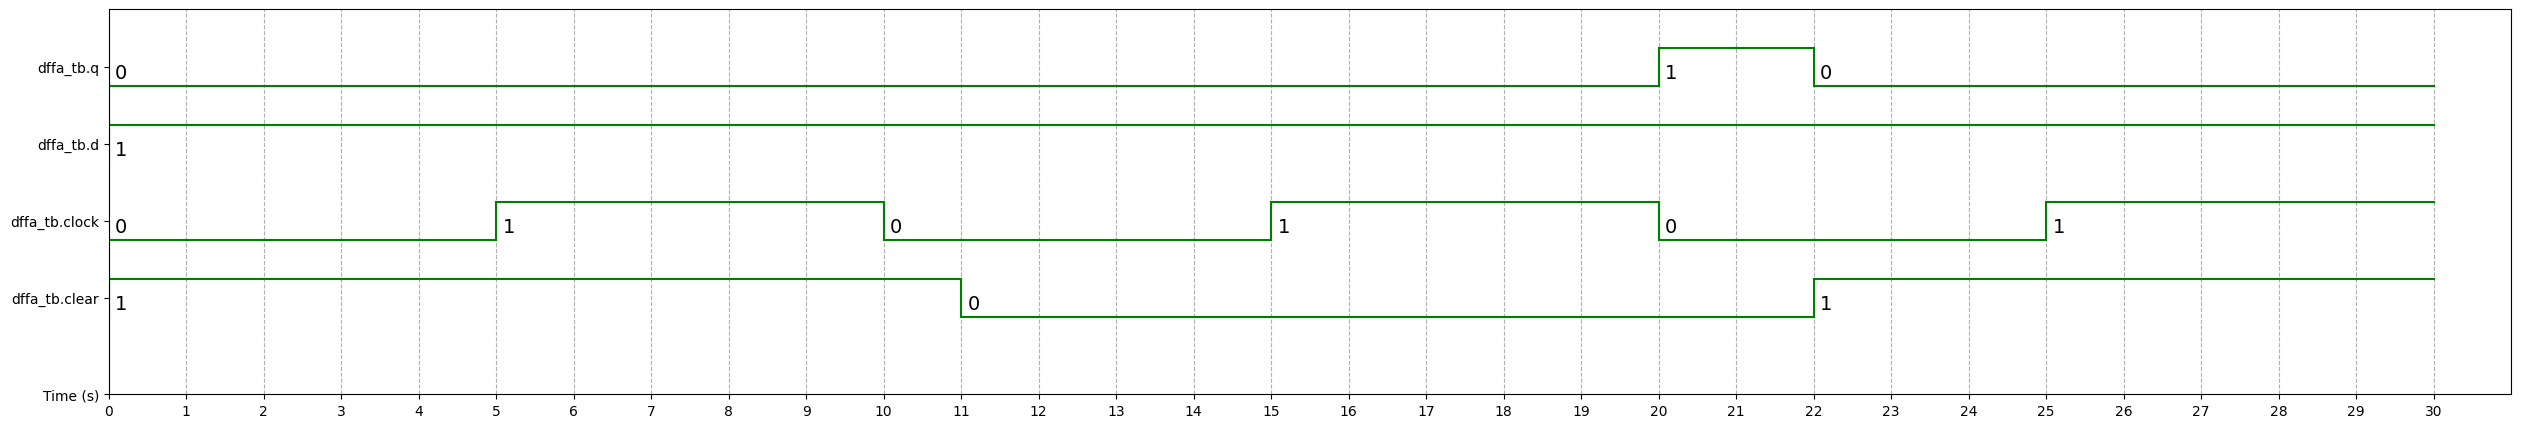

In [18]:
%%waveform dffa.vcd
sign_list = ['dffa_tb.q','dffa_tb.d','dffa_tb.clock','dffa_tb.clear']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

**Python version**

In [21]:
import time

# D Flip-Flop with asynchronous clear functionality
class DFFA:
    def __init__(self):
        self.q = 0  # Initial state of q
        self.d = 0  # Initial input
        self.clock = 0  # Initial clock value
        self.clear = 0  # Initial clear value

    def clock_edge(self):
        # Simulate the negative edge of the clock or positive edge of the clear
        if self.clear:
            self.q = 0  # Clear the output when clear is active
        else:
            self.q = self.d  # On negative edge of clock, store the input in q

    def update(self, d, clear, clock):
        self.d = d
        self.clear = clear
        self.clock = clock
        self.clock_edge()

# Testbench for D Flip-Flop with asynchronous clear
def dffa_tb():
    dffa1 = DFFA()

    # Simulation time variables
    current_time = 0
    time_step = 5  # Clock period in arbitrary time units

    # Apply signals in the sequence as per the extended Verilog testbench
    signals = [
        (1, 1, 0),  # time=0, d=1, clear=1, clock=0
        (1, 0, 1),  # time=5, d=1, clear=0, clock=1
        (0, 0, 0),  # time=10, d=0, clear=0, clock=0
        (1, 0, 1),  # time=15, d=1, clear=0, clock=1
        (0, 0, 0),  # time=20, d=0, clear=0, clock=0
        (1, 1, 1),  # time=25, d=1, clear=1, clock=1
        (1, 0, 0),  # time=30, d=1, clear=0, clock=0
        (0, 1, 1),  # time=35, d=0, clear=1, clock=1
        (1, 0, 1),  # time=40, d=1, clear=0, clock=1
        (0, 0, 0),  # time=45, d=0, clear=0, clock=0
        (1, 0, 1),  # time=50, d=1, clear=0, clock=1
        (1, 1, 0),  # time=55, d=1, clear=1, clock=0
        (0, 1, 1),  # time=60, d=0, clear=1, clock=1
        (1, 0, 0),  # time=65, d=1, clear=0, clock=0
        (0, 0, 1),  # time=70, d=0, clear=0, clock=1
        (1, 1, 0),  # time=75, d=1, clear=1, clock=0
        (0, 0, 1),  # time=80, d=0, clear=0, clock=1
        (1, 0, 0),  # time=85, d=1, clear=0, clock=0
        (1, 1, 1),  # time=90, d=1, clear=1, clock=1
        (0, 0, 0),  # time=95, d=0, clear=0, clock=0
        (1, 0, 1),  # time=100, d=1, clear=0, clock=1
        (1, 1, 0),  # time=105, d=1, clear=1, clock=0
        (0, 1, 1),  # time=110, d=0, clear=1, clock=1
        (1, 0, 0),  # time=115, d=1, clear=0, clock=0
        (0, 0, 1),  # time=120, d=0, clear=0, clock=1
    ]

    # Simulate and print output at each time step
    for d, clear, clock in signals:
        # Update and simulate DFFA behavior
        dffa1.update(d, clear, clock)
        print(f"At time {current_time} - q={dffa1.q}, d={d}, clock={clock}, clear={clear}")

        # Simulate delay (for time_step)
        time.sleep(time_step / 1000)  # Sleep for time_step converted to seconds
        current_time += time_step

# Run the simulation
if __name__ == "__main__":
    dffa_tb()


At time 0 - q=0, d=1, clock=0, clear=1
At time 5 - q=1, d=1, clock=1, clear=0
At time 10 - q=0, d=0, clock=0, clear=0
At time 15 - q=1, d=1, clock=1, clear=0
At time 20 - q=0, d=0, clock=0, clear=0
At time 25 - q=0, d=1, clock=1, clear=1
At time 30 - q=1, d=1, clock=0, clear=0
At time 35 - q=0, d=0, clock=1, clear=1
At time 40 - q=1, d=1, clock=1, clear=0
At time 45 - q=0, d=0, clock=0, clear=0
At time 50 - q=1, d=1, clock=1, clear=0
At time 55 - q=0, d=1, clock=0, clear=1
At time 60 - q=0, d=0, clock=1, clear=1
At time 65 - q=1, d=1, clock=0, clear=0
At time 70 - q=0, d=0, clock=1, clear=0
At time 75 - q=0, d=1, clock=0, clear=1
At time 80 - q=0, d=0, clock=1, clear=0
At time 85 - q=1, d=1, clock=0, clear=0
At time 90 - q=0, d=1, clock=1, clear=1
At time 95 - q=0, d=0, clock=0, clear=0
At time 100 - q=1, d=1, clock=1, clear=0
At time 105 - q=0, d=1, clock=0, clear=1
At time 110 - q=0, d=0, clock=1, clear=1
At time 115 - q=1, d=1, clock=0, clear=0
At time 120 - q=0, d=0, clock=1, clear

9. Design the 4-to-1 multiplexer by using

a) if and else statements,

b) case statements, with reference to the table below.

### 2-to-1 Multiplexer Truth Table

| **Select** |     | **Output** |
|------------|-----|------------|
| **s1**     | **s0** | **out** |
|------------|-----|------------|
| 0          | 0   | i0         |
| 0          | 1   | i1         |
| 1          | 0   | i2         |
| 1          | 1   | i3         |


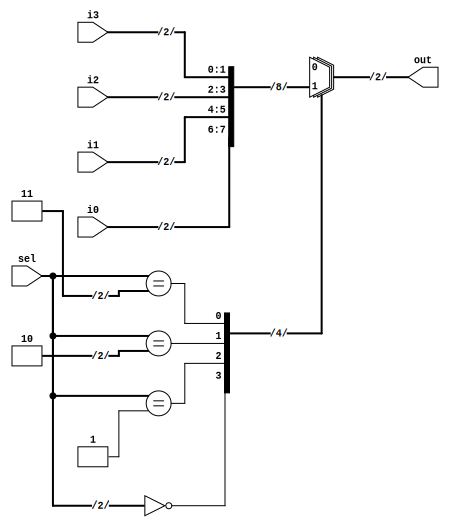

In [ ]:
%%print_verilog

//Design the 4-to-1 multiplexer by using b) case statements
module mux4to1(out,i3,i2,i1,i0,sel);
 output reg [1:0] out;
 input [1:0] i3,i2,i1,i0;
 input [1:0] sel;

 always @(*) begin
  case(sel)
   2'b00: out = i0;
   2'b01: out = i1;
   2'b10: out = i2;
   2'b11: out = i3;
   default: out = 2'bxx;
  endcase
 end

endmodule

In [22]:
%%verilog

//Design the 4-to-1 multiplexer by using b) case statements
module mux4to1(out,i3,i2,i1,i0,sel);
 output reg [1:0] out;
 input [1:0] i3,i2,i1,i0;
 input [1:0] sel;

 always @(*) begin
  case(sel)
   2'b00: out = i0;
   2'b01: out = i1;
   2'b10: out = i2;
   2'b11: out = i3;
   default: out = 2'bxx;
  endcase
 end

endmodule

module mux4to1_tb;
 wire [1:0] out;
 reg [1:0] i3,i2,i1,i0;
 reg [1:0] sel;

 mux4to1 dut(out,i3,i2,i1,i0,sel);

 initial begin
  $dumpfile("mux4to1.vcd");
  $dumpvars(0,mux4to1_tb);

  #0 i0=2'b00; i1=2'b01; i2=2'b10; i3=2'b11;
  #10 sel=2'b00;
  #10 sel=2'b01;
  #10 sel=2'b10;
  #10 sel=2'b11;
  #10 sel=2'b00;
  #10 $finish;
 end

endmodule



VCD info: dumpfile mux4to1.vcd opened for output.



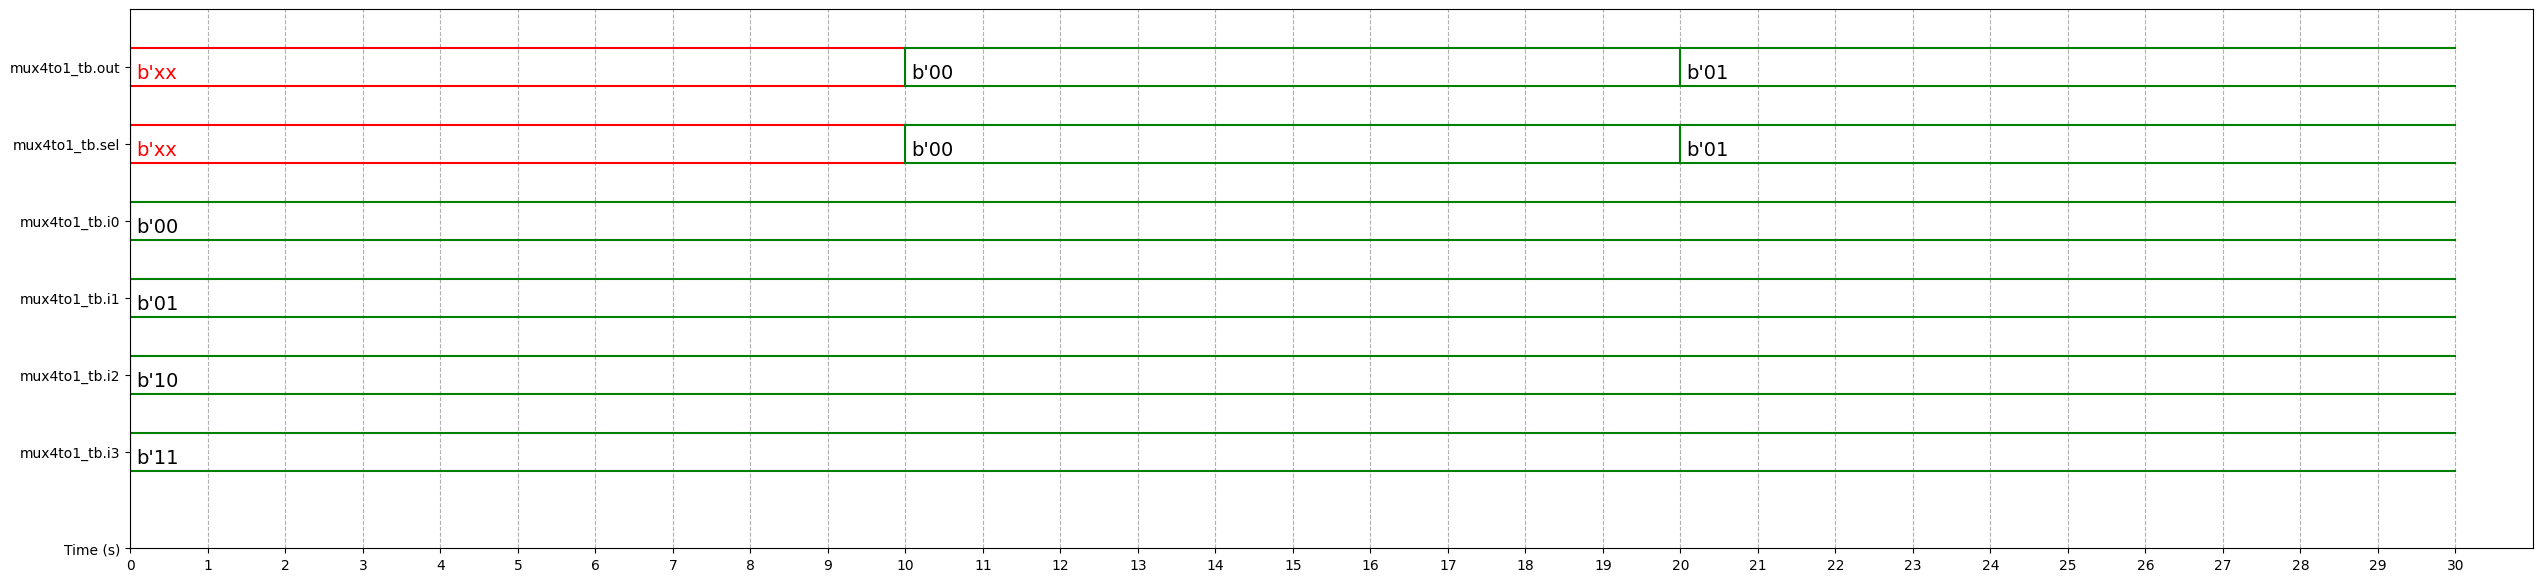

In [23]:
%%waveform mux4to1.vcd
sign_list = ['mux4to1_tb.out','mux4to1_tb.sel','mux4to1_tb.i0','mux4to1_tb.i1','mux4to1_tb.i2','mux4to1_tb.i3']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

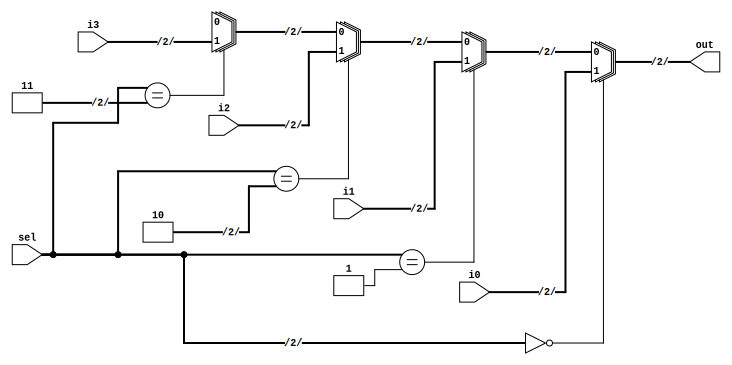

In [ ]:
%%print_verilog

//Design the 4-to-1 multiplexer by using a) if and else statements
module mux4to1a(out,i3,i2,i1,i0,sel);
 output reg [1:0] out;
 input [1:0] i3,i2,i1,i0;
 input [1:0] sel;

 always @(*) begin
  if (sel==2'b00) out = i0;
  else if (sel==2'b01) out = i1;
  else if (sel==2'b10) out = i2;
  else if (sel==2'b11) out = i3;
  else out = 2'bxx;
 end

endmodule

In [24]:
%%verilog

//Design the 4-to-1 multiplexer by using a) if and else statements
module mux4to1a(out,i3,i2,i1,i0,sel);
 output reg [1:0] out;
 input [1:0] i3,i2,i1,i0;
 input [1:0] sel;

 always @(*) begin
  if (sel==2'b00) out = i0;
  else if (sel==2'b01) out = i1;
  else if (sel==2'b10) out = i2;
  else if (sel==2'b11) out = i3;
  else out = 2'bxx;
 end

endmodule

module mux4to1a_tb;
 wire [1:0] out;
 reg [1:0] i3,i2,i1,i0;
 reg [1:0] sel;

 mux4to1a dut(out,i3,i2,i1,i0,sel);

 initial begin
  $dumpfile("mux4to1a.vcd");
  $dumpvars(0,mux4to1a_tb);

  #0 i0=2'b00; i1=2'b01; i2=2'b10; i3=2'b11;
  #10 sel=2'b00;
  #10 sel=2'b01;
  #10 sel=2'b10;
  #10 sel=2'b11;
  #10 sel=2'b00;
  #10 $finish;
 end

endmodule


VCD info: dumpfile mux4to1a.vcd opened for output.



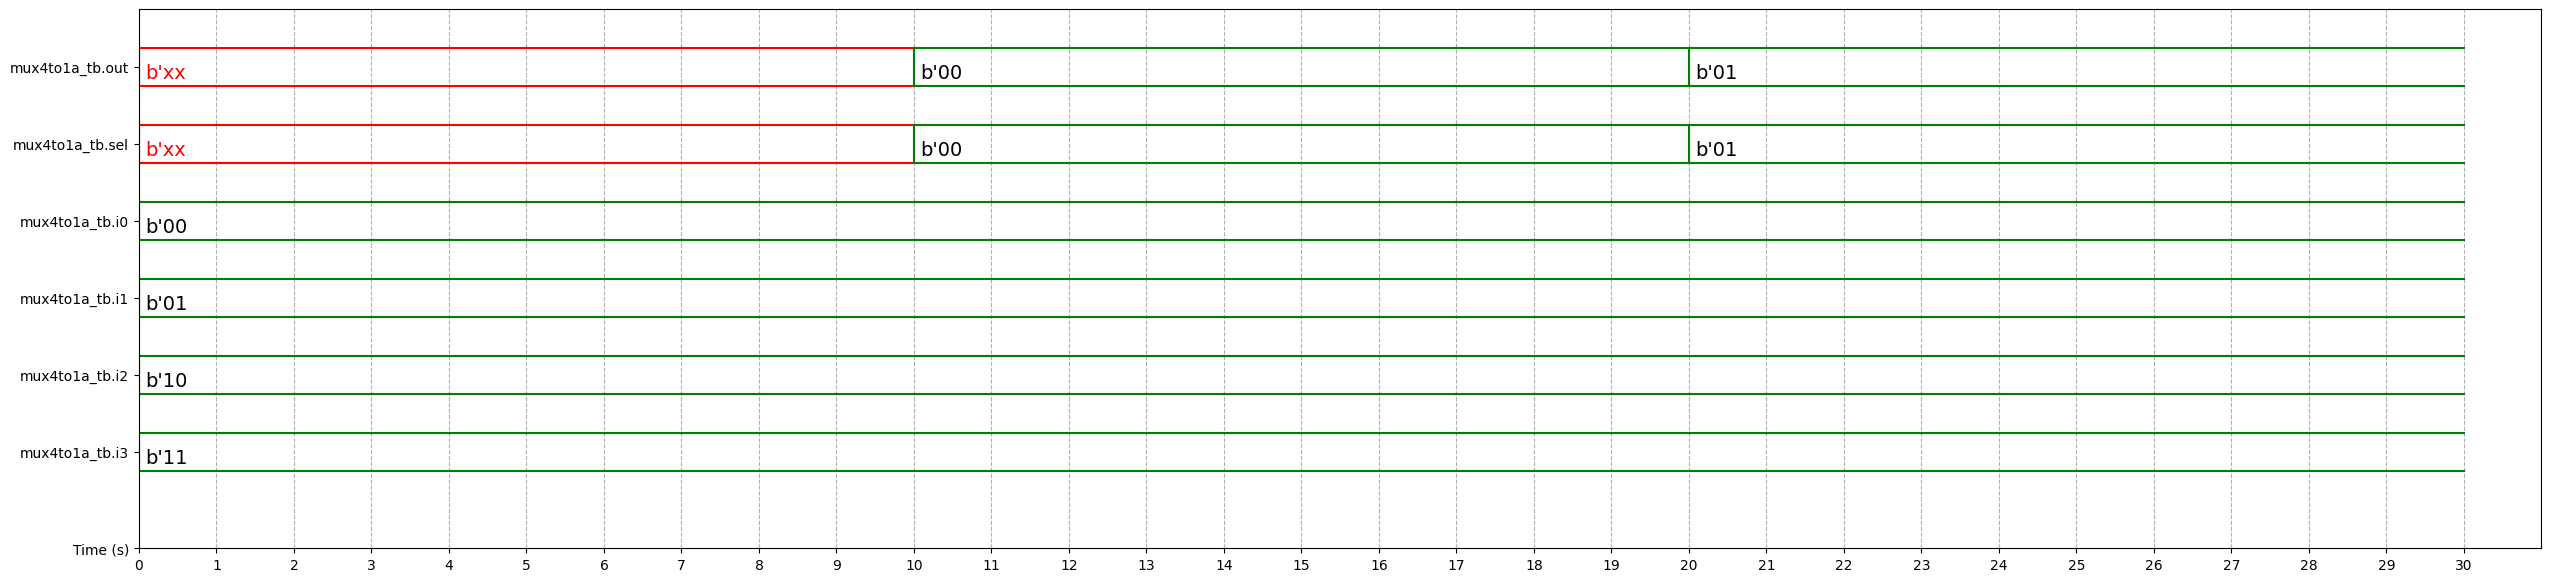

In [25]:
%%waveform mux4to1a.vcd
sign_list = ['mux4to1a_tb.out','mux4to1a_tb.sel','mux4to1a_tb.i0','mux4to1a_tb.i1','mux4to1a_tb.i2','mux4to1a_tb.i3']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

**Python Version**

In [26]:
import time

# 4-to-1 Multiplexer
class Mux4to1:
    def __init__(self):
        self.out = 0  # Output of the multiplexer
        self.i3 = 0  # Input i3
        self.i2 = 0  # Input i2
        self.i1 = 0  # Input i1
        self.i0 = 0  # Input i0
        self.sel = 0  # Selection input

    def update(self, i0, i1, i2, i3, sel):
        # Setting inputs and selection
        self.i0, self.i1, self.i2, self.i3, self.sel = i0, i1, i2, i3, sel

        # Multiplexer logic (4-to-1)
        if self.sel == 0:
            self.out = self.i0
        elif self.sel == 1:
            self.out = self.i1
        elif self.sel == 2:
            self.out = self.i2
        elif self.sel == 3:
            self.out = self.i3
        else:
            self.out = "xx"  # Default case (error condition)

# Testbench for the 4-to-1 multiplexer
def mux4to1_tb():
    mux = Mux4to1()

    # Simulation time variables
    current_time = 0
    time_step = 10  # Clock period in arbitrary time units

    # Apply signals in the sequence as per the Verilog testbench
    signals = [
        (0, 1, 2, 3, 0),  # time=0, i0=00, i1=01, i2=10, i3=11, sel=00
        (0, 1, 2, 3, 1),  # time=10, sel=01
        (0, 1, 2, 3, 2),  # time=20, sel=10
        (0, 1, 2, 3, 3),  # time=30, sel=11
        (0, 1, 2, 3, 0),  # time=40, sel=00 (reset)
    ]

    for i0, i1, i2, i3, sel in signals:
        # Update and simulate Mux behavior at each step
        mux.update(i0, i1, i2, i3, sel)
        print(f"At time {current_time} - out={mux.out}, i0={i0}, i1={i1}, i2={i2}, i3={i3}, sel={sel}")

        # Simulate delay
        time.sleep(time_step / 1000)  # Sleep for 10 time units (converted to seconds)
        current_time += time_step

# Run the simulation
if __name__ == "__main__":
    mux4to1_tb()


At time 0 - out=0, i0=0, i1=1, i2=2, i3=3, sel=0
At time 10 - out=1, i0=0, i1=1, i2=2, i3=3, sel=1
At time 20 - out=2, i0=0, i1=1, i2=2, i3=3, sel=2
At time 30 - out=3, i0=0, i1=1, i2=2, i3=3, sel=3
At time 40 - out=0, i0=0, i1=1, i2=2, i3=3, sel=0
